# Bathymetry closeup

Get a closeup to a particular part of bathymetry file and compare with underlying gebco data.
See https://github.com/OceansAus/access-om2/issues/99

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import netCDF4 as nc
import IPython.display

In [2]:
# file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'

# see https://github.com/OceansAus/access-om2/issues/99
badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'
fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'


baddepth = nc.Dataset(badbathyfile).variables['depth'][:,:]
depth = nc.Dataset(fixedbathyfile).variables['depth'][:,:]

file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

In [3]:
gebcofile = '/g/data3/hh5/tmp/cosima/bathymetry/gebco.nc'
gebcodata = nc.Dataset(gebcofile)
gebcodepth = -gebcodata.variables['height'][:,:]
gebcolat = gebcodata.variables['lat'][:]
gebcolon = gebcodata.variables['lon'][:]

In [28]:
# location of point of interest as reported by MOM (indexing from 1 presumably)

# Error: temperature out of range with value     5.579899101702E+01 at (i,j,k) = (2153,2093,  3),  (lon,lat,dpt) = (  -64.7500,   64.3310,    3.0106 m)
# This location is at the coast on the southern side of the mouth of Cumberland Sound on the east coast of Baffin Island:
# <https://www.google.com.au/maps/place/64.3310N+64.7500W/>
i = 2153
j = 2093

# # This is the lone land mask update point (indexed from 1)
# i = 1559
# j = 2610

# # Another non-advective point? https://github.com/OceansAus/access-om2/issues/99#issuecomment-396932498
i = 2140
j = 2318

i = 3080
j = 2599

# i = 2123
# j = 2609

# i = 2133
# j = 2624

# # Another non-advective point? looks ok? https://github.com/OceansAus/access-om2/issues/99#issuecomment-397149154
# i = 2049
# j = 640

# # Another non-advective point? looks ok? https://github.com/OceansAus/access-om2/issues/99#issuecomment-397152974
# i = 1573
# j = 1801

# # Another non-advective point? - no, looks ok
# i = 3170
# j = 277

# # 01deg_jra55_ryf_tripole_bug
# # FATAL from PE   790:  Error: temperature out of range with value    -2.353802824837E+01 at (i,j,k) = ( 899, 568, 48),  (lon,lat,dpt) = ( -190.1500,  -55.9169, 1114.9185 m)
# i = 899
# j = 568

# # ----------------------------------
# # all the following have
# # remap transport: bad departure points

# # South of Victoria Island
# i = 1726
# j = 2671

# i = 1720
# j = 2676

# i = 1726
# j = 2671

# i = 1723
# j = 2654

# i = 1725
# j = 2656

# i = 1724
# j = 2641

# i = 1726
# j = 2657

# i = 1725
# j = 2670

# # # Head of Gulf of Ob
# # i = 3515
# # j = 2297

# # i = 3514
# # j = 2301

# # i = 3515
# # j = 2314

# # # Antarctic sea ice edge
# # i = 1690
# # j = 365

# # i = 3021
# # j = 538

# # # Antarctic coast
# # i = 3475
# # j = 318

margin = 60

In [29]:
# adjust to suit 0-starting index (assuming MOM reports indexing from 1)
i -= 1
j -= 1
print('depth('+str(i)+','+str(j)+')='+str(depth[j,i]))

depth(3079,2598)=10.4328


In [30]:
jgebco = (np.abs(gebcolat - lats[j,i])).argmin()
igebco = (np.abs(gebcolon - lons[j,i])).argmin()

jp = j-margin
ip = i-margin
jp = max(0, min(len(lats)-1, jp))
ip = max(0, min(len(lons)-1, ip))
jgebcoa = (np.abs(gebcolat - lats[jp,ip])).argmin()
igebcoa = (np.abs(gebcolon - lons[jp,ip])).argmin()

jp = j+margin
ip = i+margin
jp = max(0, min(len(lats)-1, jp))
ip = max(0, min(len(lons)-1, ip))
jgebcob = (np.abs(gebcolat - lats[jp,ip])).argmin()
igebcob = (np.abs(gebcolon - lons[jp,ip])).argmin()

# gebco boundaries to match mom (roughly in tripole)
igebcomin = min(igebcoa, igebcob)
jgebcomin = min(jgebcoa, jgebcob)
igebcomax = max(igebcoa, igebcob)
jgebcomax = max(jgebcoa, jgebcob)

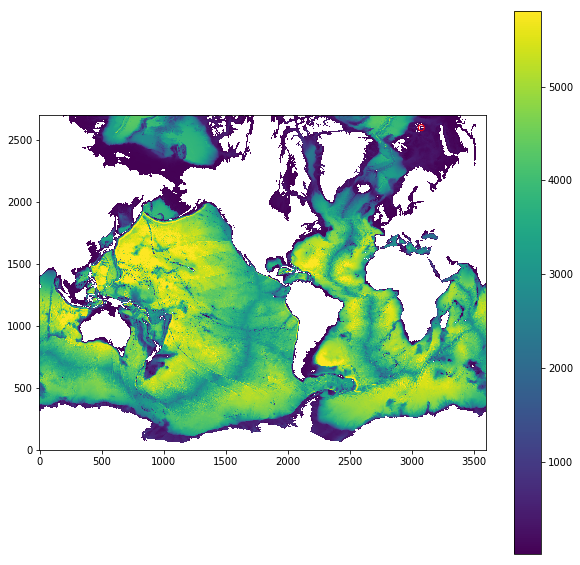

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(depth, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r');

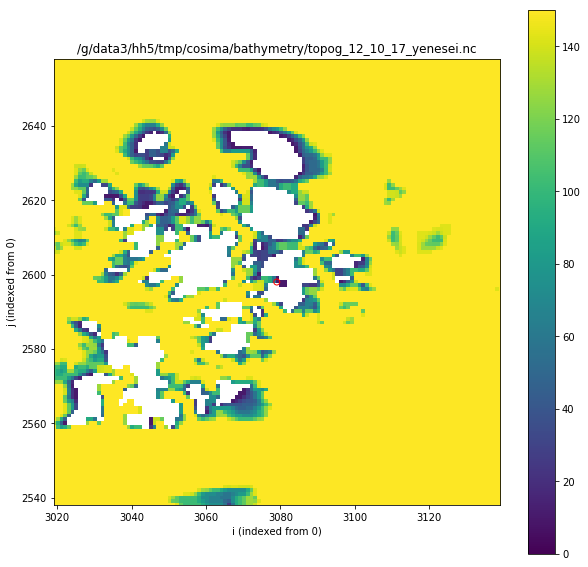

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(baddepth, vmin=0, vmax=150, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

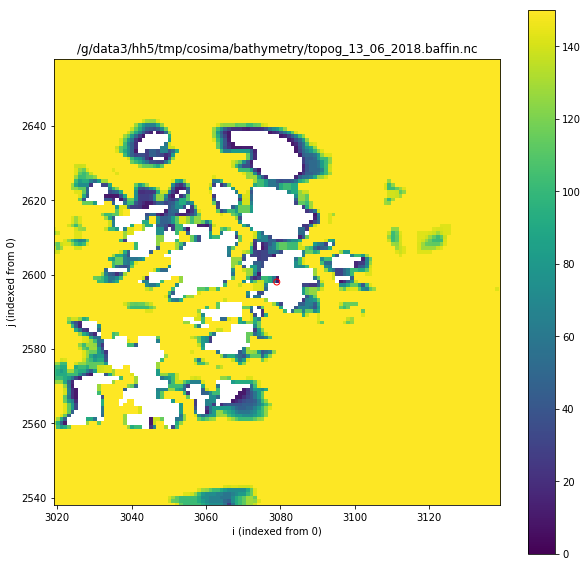

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(depth, vmin=0, vmax=150, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

In [10]:
gebcodepthplot = gebcodepth[jgebcomin:jgebcomax,igebcomin:igebcomax]
# gebcodepthplot[gebcodepthplot<0.0] = np.float64(np.nan)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


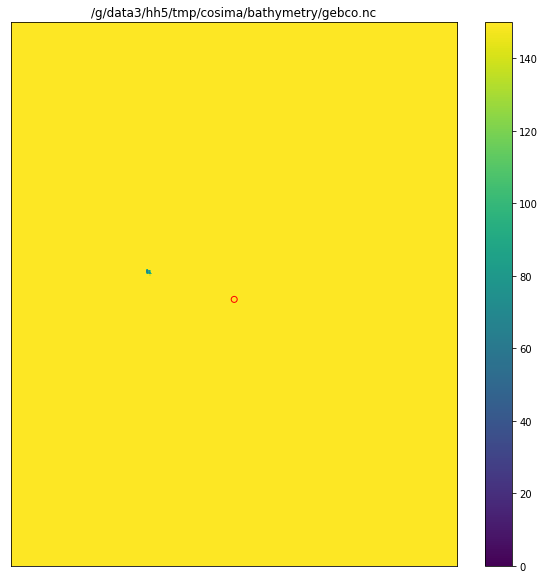

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(gebcodepthplot, vmin=0, vmax=150, origin='lower',aspect='auto')
plt.colorbar()
plt.contour(gebcodepthplot,[0],colors='w')
plt.scatter(igebco-igebcomin,jgebco-jgebcomin, facecolors='none', edgecolors='r')
plt.title(gebcofile)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([]);
# plt.xlabel('i')
# plt.ylabel('j')

## Changes in bathymetry (apart from landmask)
see https://github.com/OceansAus/access-om2/issues/99

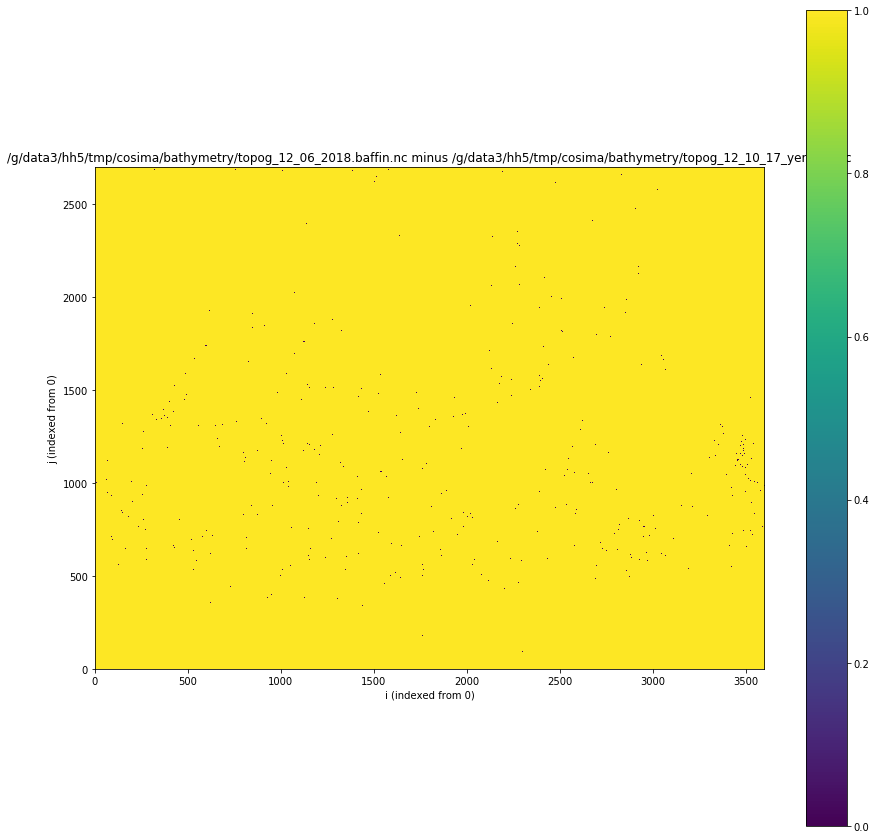

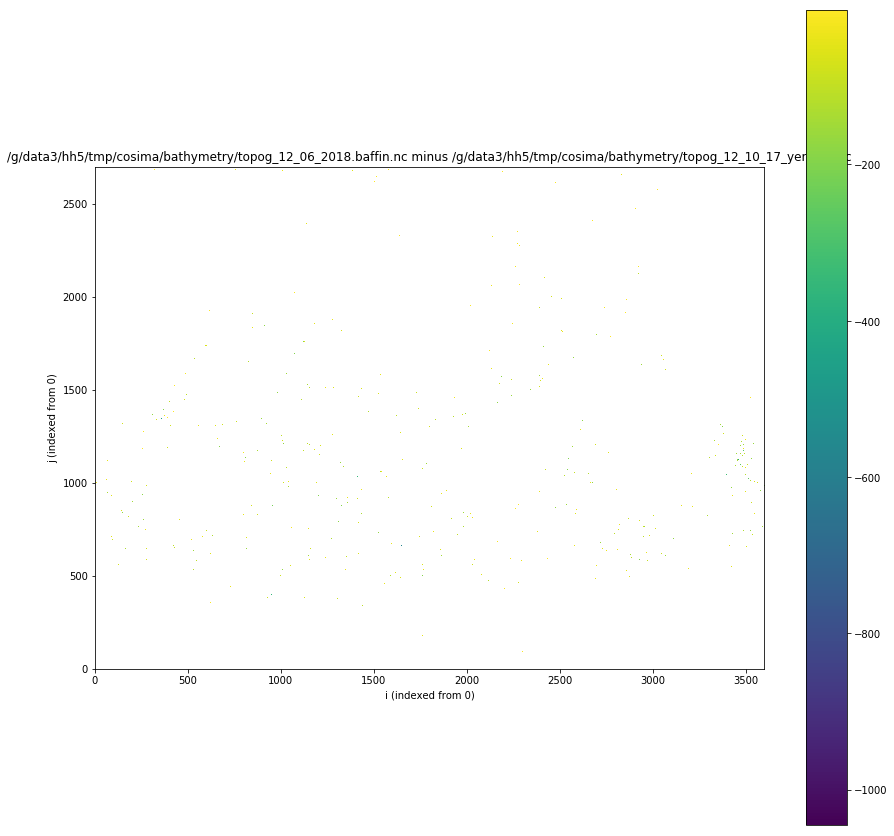

In [12]:
depthchange = depth-baddepth
# change mask so we don't plot points with zero depth change
depthchange.mask = np.ma.mask_or(np.ma.getmask(depthchange),np.ma.make_mask(depthchange==0))

plt.figure(figsize=(15,15))
plt.imshow(depthchange.mask, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(depthchange, origin='lower')
plt.colorbar()
# plt.contour(depth,[11],colors='k')
# plt.scatter(i,j, facecolors='none', edgecolors='r')
# plt.xlim(i-margin,i+margin)
# plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile+' minus '+badbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

All depth changes are negative, i.e. ocean is filled in. Most changes are small. 10595 non-masked points changed (0.1%).

In [13]:
np.ma.max(depth-baddepth)

0.0

In [14]:
np.ma.max(depthchange)

-2.1790781

In [15]:
np.ma.min(depthchange)

-1045.592

In [16]:
np.ma.mean(depthchange)

-89.757468145351581

In [17]:
np.ma.median(depthchange)

-73.055176

In [18]:
np.ma.count(depthchange)

10595

In [19]:
np.shape(depthchange)

(2700, 3600)

In [20]:
np.ma.count(depthchange)/(2700*3600)

0.0010900205761316872

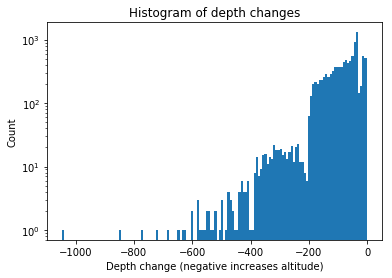

In [21]:
plt.hist(np.ma.ravel(depthchange), bins=140, log=True);
plt.xlabel('Depth change (negative increases altitude)')
plt.ylabel('Count');
plt.title('Histogram of depth changes');

### Landmask change
+1 = land added; -1= land removed.

There has been no land removed. There are 109 more land points, 108 on Baffin Island and 1 on Victoria Island.

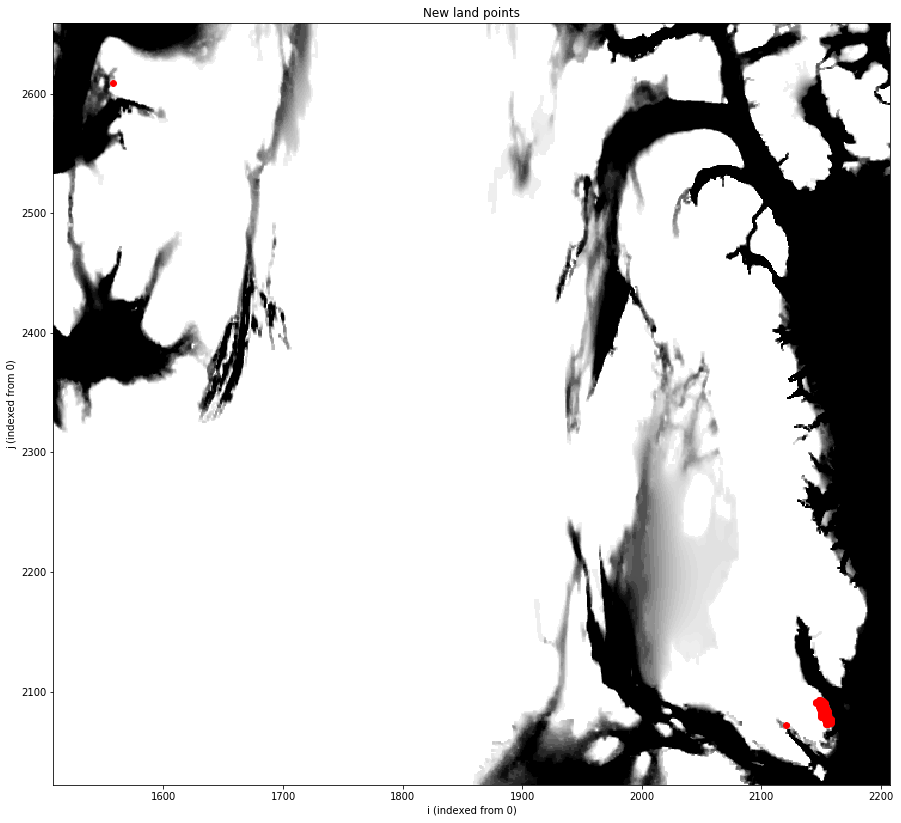

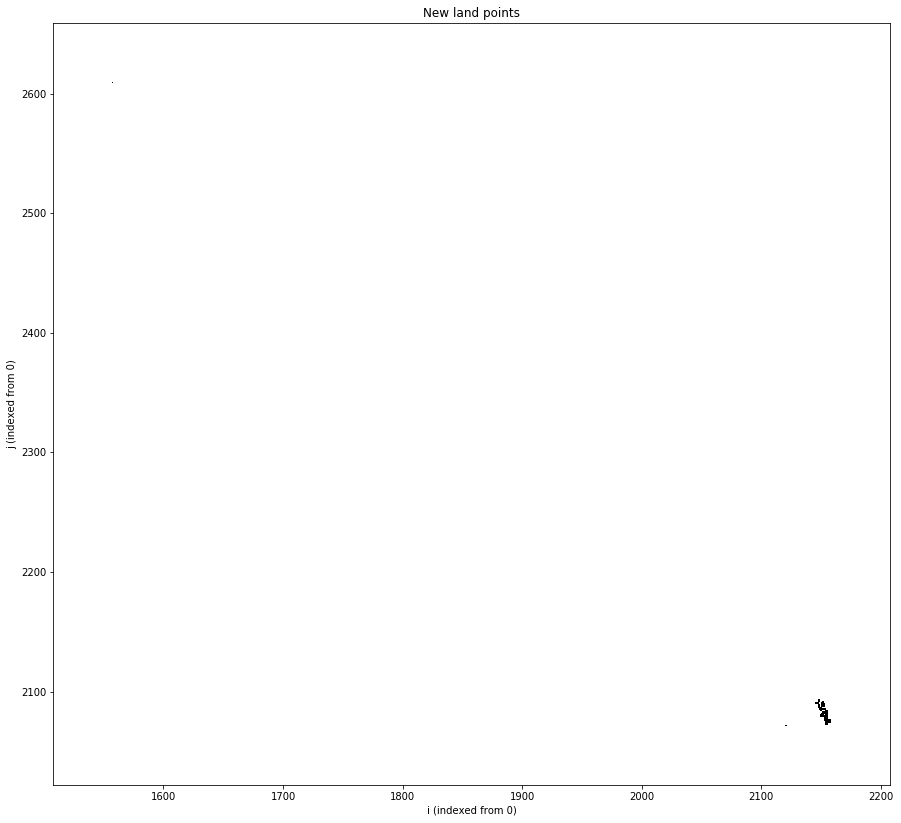

In [22]:
maskdiff = np.ma.getmask(depth).astype(int)-np.ma.getmask(baddepth).astype(int)
jj,ii=np.nonzero(maskdiff)

# plt.figure(figsize=(15,15))
# plt.imshow(maskdiff, origin='lower')
# plt.colorbar()
# # plt.scatter(jj,ii, facecolors='none', edgecolors='w')
# plt.title('New land points')
# plt.xlabel('i (indexed from 0)')
# plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(depth, vmin=0, vmax=150, origin='lower', cmap=cm.binary)
plt.scatter(ii,jj, facecolors='r', edgecolors='r')
plt.xlim(min(ii)-margin,max(ii)+margin)
plt.ylim(min(jj)-margin,max(jj)+margin)
plt.title('New land points')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

plt.figure(figsize=(15,15))
plt.imshow(maskdiff, origin='lower', cmap=cm.binary)
plt.xlim(min(ii)-margin,max(ii)+margin)
plt.ylim(min(jj)-margin,max(jj)+margin)
plt.title('New land points')
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');


In [23]:
np.ma.min(maskdiff)

0

In [24]:
np.count_nonzero(maskdiff)

109

In [25]:
np.count_nonzero(maskdiff[j-margin:j+margin,i-margin:i+margin])

0